# Airbnb Amsterdam

>> 0. Importuojam failus

In [6]:
import datetime
import re
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.signal as signal
sns.set()

In [7]:
listings = pd.read_csv(
    "C:\\Users\\jkved\\Desktop\\bio\\biod2021\\airbnb\\listings.csv", index_col="id") #indeksuojam pagal id- esminis apjungiantis elementuas
listings_details = pd.read_csv(
    "C:\\Users\\jkved\\Desktop\\bio\\biod2021\\airbnb\\listings_detail.csv",
    index_col="id")
calendar = pd.read_csv(
    "C:\\Users\\jkved\\Desktop\\bio\\biod2021\\airbnb\\calendar.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

reviews = pd.read_csv(
    "C:\\Users\\jkved\\Desktop\\bio\\biod2021\\airbnb\\reviews.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

reviews_details = pd.read_csv(
    "C:\\Users\\jkved\\Desktop\\bio\\biod2021\\airbnb\\reviews_details.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

C:\Users\jkved\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
pd.set_option("display.max_column", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_seq_items", 500)
pd.set_option("display.max_colwidth", 500)
pd.set_option("expand_frame_repr", True)

In [9]:
listings.head(3)

name  host_id  host_name  \
id                                                                             
2818            Quiet Garden View Room & Super Fast WiFi     3159     Daniel   
20168       Studio with private bathroom in the centre 1    59484  Alexander   
25428  Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.    56142       Joan   

       neighbourhood_group                           neighbourhood  latitude  \
id                                                                             
2818                   NaN  Oostelijk Havengebied - Indische Buurt  52.36435   
20168                  NaN                            Centrum-Oost  52.36407   
25428                  NaN                            Centrum-West  52.37490   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
id                                                                            
2818     4.94358     Private room     59               3                280   
20168    4.89393     Private room    106               1                339   
25428    4.88487  Entire home/apt    125              14                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                     
2818   2019-11-21               2.86                               1   
20168  2020-03-27               3.64                               2   
25428  2020-01-02               0.11                               1   

       availability_365  number_of_reviews_ltm                   license  
id                                                                        
2818                124                      2  0363 5F3A 5684 6750 D14D  
20168                 0                      0  0363 CBB3 2C10 0C2A 1E29  
25428                57                      0                       NaN

In [6]:
listings.shape

(16116, 17)

In [7]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
listings_details.shape

(16116, 73)

In [9]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [11]:
target_columns = [
    "property_type",
    "accommodates",
    "first_review",
    "review_scores_value",
    "review_scores_cleanliness",
    "review_scores_location",
    "review_scores_accuracy",
    "review_scores_communication",
    "review_scores_checkin",
    "review_scores_rating",
    "maximum_nights",
    "listing_url",
    "host_is_superhost",
    "host_about",
    "host_response_time",
    "host_response_rate",
]
listings = pd.merge(
    listings, listings_details[target_columns], on="id", how="left")

In [11]:
listings.head(1)

name  host_id host_name  \
id                                                                  
2818  Quiet Garden View Room & Super Fast WiFi     3159    Daniel   

      neighbourhood_group                           neighbourhood  latitude  \
id                                                                            
2818                  NaN  Oostelijk Havengebied - Indische Buurt  52.36435   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
id                                                                        
2818    4.94358  Private room     59               3                280   

     last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                    
2818  2019-11-21               2.86                               1   

      availability_365  number_of_reviews_ltm                   license  \
id                                                                        
2818               124                      2  0363 5F3A 5684 6750 D14D   

                    property_type  accommodates first_review  \
id                                                             
2818  Private room in rental unit             2   2013-08-25   

      review_scores_value  review_scores_cleanliness  review_scores_location  \
id                                                                             
2818                 4.81                        5.0                    4.68   

      review_scores_accuracy  review_scores_communication  \
id                                                          
2818                    4.93                         4.97   

      review_scores_checkin  review_scores_rating  maximum_nights  \
id                                                                  
2818                   4.97                  4.89              28   

                            listing_url host_is_superhost  \
id                                                          
2818  https://www.airbnb.com/rooms/2818                 t   

                                                                                                                                                                                                                                                                                                                                             host_about  \
id                                                                                                                                                                                                                                                                                                                                                        
2818  Upon arriving in Amsterdam, one can imagine asking oneself: Where is the fun nightlife? What are the local hot spots? \r\n\r\nHow can I experience the real life in this city? I  offer you the opportunity to act, eat and sleep like-a-local!  \r\n\r\nI provide the traveler with the opportunity to connect with the local life in Amsterdam.   

     host_response_time host_response_rate  
id                                          
2818     within an hour               100%

>> Top 10 savininkų (daugiausiai nuomoja, uždirba)

- daugiausiai nuomoja

In [12]:
top10Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(10)
)
print(top10Id)

         host_id  count
4890    14874061     30
4824    14574533     21
12984  203731852     20
12667  178187873     19
11524  113977564     17
14165  405910842     17
10037   67005410     16
13361  241644101     15
6181    21167882     14
3729    10076897     13


In [13]:
for t_id in top10Id["host_id"].to_numpy():
    print(listings.loc[listings["host_id"] == t_id].iloc[1, 2])

Jasper
Hotel Not Hotel
SWEETS Hotel
Marcel And Pauline
Willem
Marcel
Feliciano
Wittenberg
Pauline
Geraldine


- daugiausiai uždirba 

In [14]:
top100Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(100)
)
top100Id.head()

host_id  count
4890    14874061     30
4824    14574533     21
12984  203731852     20
12667  178187873     19
11524  113977564     17

In [15]:
cummulative_sum = (
    listings[listings["host_id"].isin(top100Id["host_id"])]
    .groupby("host_id")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
cummulative_sum.head()

host_id
271275338    5260
14874061     5076
241644101    4316
203731852    4137
178187873    3541
Name: price, dtype: int64

In [16]:
for c_id, c_sum in zip(cummulative_sum.index.to_numpy(), cummulative_sum.to_numpy()):
    print(
        f'{listings.loc[listings["host_id"] == c_id].iloc[1, 2]} earns {c_sum}')

Residence Eighty Five earns 5260
Jasper earns 5076
Wittenberg earns 4316
SWEETS Hotel earns 4137
Marcel And Pauline earns 3541
Suzanne earns 3055
Esther & Jan earns 3053
Herman earns 2884
Alina & Sarah earns 2700
J earns 2388


>> 2. Kaip dienos kaina kinta jeigu nuomojamasi savaitei/mėnesiui/dienai (listings)

- kadangi duomenyse nebuvo informacijos, kaip kinta kaina nuomojantis skirtingam laikui, apskaičiavau, kiek kainuoja nuomojantis minimaliam/maksimaliam naktų skaičiui ir vidutinę kainą abiem atvejais

In [17]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'property_type', 'accommodates',
       'first_review', 'review_scores_value', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_rating', 'maximum_nights', 'listing_url',
       'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate'],
      dtype='object')

In [18]:
listings.price.head()

id
2818      59
20168    106
25428    125
27886    141
28871     75
Name: price, dtype: int64

- minimalus naktų skaičius

In [19]:
(listings.price * listings.minimum_nights).dropna()

id
2818         177
20168        106
25428       1750
27886        282
28871        150
            ... 
52001423     200
52016670     258
52018685     179
52050333     264
52082799     357
Length: 16116, dtype: int64

In [20]:
(listings.price * listings.minimum_nights).dropna().mean()

672.3710598163316

- maksimalus naktų skaičius

In [21]:
(listings.price * listings.maximum_nights).dropna()

id
2818          1652
20168        38690
25428        15000
27886       102930
28871       136875
             ...  
52001423       300
52016670      5934
52018685    201375
52050333     32120
52082799    133875
Length: 16116, dtype: int64

In [22]:
(listings.price * listings.maximum_nights).dropna().mean()

94704.64885827749

>> 3. Kaip kaina priklauso nuo vietos mieste įvertinimo? Švaros? ir t.t

Text(0, 0.5, 'price')

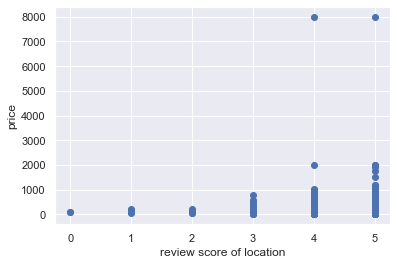

In [15]:
plt.scatter(round(listings.review_scores_location), listings.price)
plt.xlabel("review score of location")
plt.ylabel("price")

In [58]:
review_scores=round(listings.review_scores_location)
listings.groupby(review_scores).price.mean()

review_scores_location
0.0     87.500000
1.0    124.714286
2.0    122.625000
3.0    138.447917
4.0    136.562187
5.0    156.286834
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='review_scores_location'>

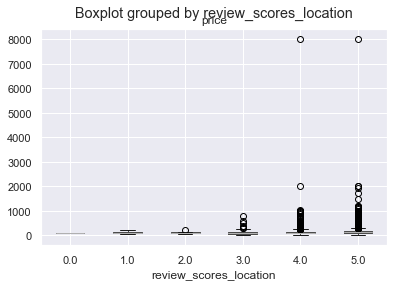

In [59]:
listings["review_scores_location"]=round(listings["review_scores_location"])
listings.boxplot(column="price", by="review_scores_location")

<AxesSubplot:title={'center':'price'}, xlabel='review_scores_cleanliness'>

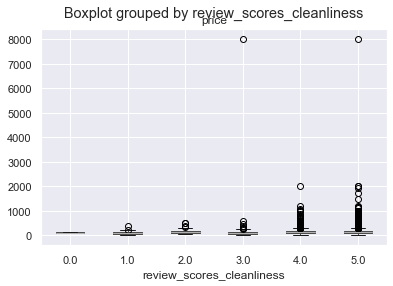

In [61]:
listings["review_scores_cleanliness"]=round(listings["review_scores_cleanliness"])
listings.boxplot(column="price", by="review_scores_cleanliness")

<AxesSubplot:title={'center':'price'}, xlabel='review_scores_communication'>

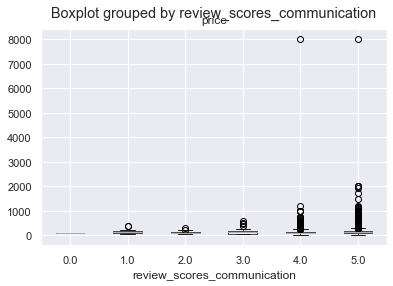

In [62]:
listings["review_scores_communication"]=round(listings["review_scores_communication"])
listings.boxplot(column="price", by="review_scores_communication")

<AxesSubplot:title={'center':'price'}, xlabel='review_scores_accuracy'>

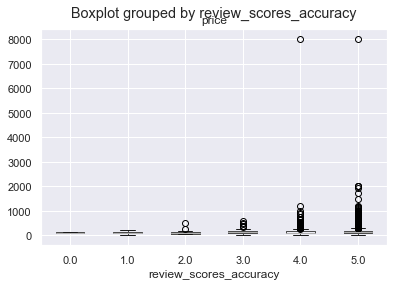

In [63]:
listings["review_scores_accuracy"]=round(listings["review_scores_accuracy"])
listings.boxplot(column="price", by="review_scores_accuracy")

>> 4.Rasti savininkus įvardintus kaip 'superhosts'. Kokią dalį visų nuomotojų jie sudaro?

In [43]:
listings.host_is_superhost.isnull().sum()

5

In [44]:
total = listings.host_is_superhost.shape[0]
total

16116

In [45]:
superhosts = listings.host_is_superhost.str.count(r"t").sum()
superhosts

2008.0

In [46]:
print(f" Super hosts are {superhosts/total*100:.3}% of all the landlords")

 Super hosts are 12.5% of all the landlords


>> 5. Ilgiausias komentaras (reviews_details)

In [47]:
reviews_details.comments.iloc[0]

'Daniel is really cool. The place was nice and clean. Very quiet neighborhood. He had maps and a lonely planet guide book in the room for you to use. I didnt have any trouble finding the place from Central Station. I would defintely come back! Thanks!'

In [48]:
len(reviews_details.comments.iloc[0])

250

In [49]:
reviews_details.comments.str.len().sort_values(ascending=False).head()

listing_id
4076501     6184.0
15260123    6048.0
4947466     5728.0
3566834     5620.0
18517833    5582.0
Name: comments, dtype: float64

In [50]:
reviews_details.loc[4076501]

id       date  reviewer_id       reviewer_name  \
listing_id                                                                   
4076501               19653821 2014-09-15     21154810                Rolf   
4076501               20056653 2014-09-22     15887486          Heidemarie   
4076501               34244419 2015-06-06     26460711                  小某   
4076501               34575398 2015-06-09      4036099               Nicky   
4076501               36335484 2015-06-27      4850535              Janita   
4076501               43149639 2015-08-17     40269248             Laurent   
4076501               48596301 2015-09-27      7028143              Isabel   
4076501               51522170 2015-10-21     29495129                Ildi   
4076501               58716299 2016-01-03       643961               Mandy   
4076501               73499192 2016-05-08     41141860              Roshan   
4076501               74851158 2016-05-17       244211               Paola   
4076501               75309242 2016-05-20     56155294             Michael   
4076501               76504368 2016-05-27     70497953               Jamie   
4076501               76768492 2016-05-29     70169924              Blythe   
4076501               82704328 2016-06-29      1341078             Mahmood   
4076501               87244713 2016-07-19     14553776                Yann   
4076501               94411041 2016-08-15     11497974              Benoît   
4076501               94804856 2016-08-17     74442911               Laura   
4076501               96082430 2016-08-21     19582492              Miriam   
4076501               96746640 2016-08-24      7384035              Preeti   
4076501              101583786 2016-09-14     82975831             Charlie   
4076501              103940790 2016-09-25       526004              Husain   
4076501              105536538 2016-10-02     47957759            Cathleen   
4076501              130515947 2017-02-06     57778166                 Tom   
4076501              131044868 2017-02-10     97673895             Ludovic   
4076501              131423681 2017-02-12     90052139               Diane   
4076501              132499903 2017-02-18     44067413           Elizabeth   
4076501              158122737 2017-06-05     12714595             Kirsten   
4076501              163759241 2017-06-25    117639007           Alexander   
4076501              164448558 2017-06-27     19347749                Alin   
4076501              165006149 2017-06-30     11318929            Philippe   
4076501              166752147 2017-07-04     12535081           Alexandra   
4076501              170031584 2017-07-14    139075976          Clementine   
4076501              170853899 2017-07-16     74985610              Sandra   
4076501              173461686 2017-07-23     68264370          Christophe   
4076501              196876381 2017-09-24      3978284                Cory   
4076501              224540221 2018-01-03       215019               Ahmed   
4076501              250248364 2018-04-04     85965791               Jiayi   
4076501              252399092 2018-04-10     21108180  Alessandra & Vinay   
4076501              268215955 2018-05-24     43101181              Pierce   
4076501              279689944 2018-06-21     40227455                 Tom   
4076501              305342473 2018-08-11    120227910               Grace   
4076501              306765188 2018-08-13    181584524             Xuan Mu   
4076501              316331759 2018-08-31     57118976               Margo   
4076501              317617714 2018-09-02      8299711                Sean   
4076501              325202357 2018-09-19    179246178             Beatriz   
4076501              332039322 2018-10-04      5067794               Bijan   
4076501              338290866 2018-10-19     21852253                Olga   
4076501              343336115 2018-10-31     59220732               Tirta   
4076501              351548861 2018-11-23     6820

In [51]:
for review in reviews_details.loc[4076501].comments:
    print(len(review))

124
328
223
173
112
20
261
407
66
1190
381
354
275
801
78
210
165
296
856
196
1165
34
341
648
29
40
383
224
55
210
98
1285
274
289
72
925
135
664
1135
65
92
643
174
403
211
636
443
435
182
183
27
273
99
47
109
378
671
209
505
301
134
303
672
6184
516
122
223
190
102
259
120
117
360
81
576
186
177
58
117
425
116
126
178
268
176


In [52]:
reviews_details.loc[4076501].set_index("id")["comments"].str.len()

id
19653821               124
20056653               328
34244419               223
34575398               173
36335484               112
43149639                20
48596301               261
51522170               407
58716299                66
73499192              1190
74851158               381
75309242               354
76504368               275
76768492               801
82704328                78
87244713               210
94411041               165
94804856               296
96082430               856
96746640               196
101583786             1165
103940790               34
105536538              341
130515947              648
131044868               29
131423681               40
132499903              383
158122737              224
163759241               55
164448558              210
165006149               98
166752147             1285
170031584              274
170853899              289
173461686               72
196876381              925
224540221              13

>> 6. Daugiausiai komentarų turinti vieta

In [53]:
reviews_details.groupby("listing_id")["id"].count(
).sort_values(ascending=False).head(1)

listing_id
82482    877
Name: id, dtype: int64

In [54]:
reviews_details.loc[82482]

id       date  reviewer_id reviewer_name  \
listing_id                                                             
82482                   320921 2011-06-18       588248   Frank & Ann   
82482                   330595 2011-06-23       689749       Michael   
82482                   343702 2011-06-30       252259         Chris   
82482                   358197 2011-07-07       466642    Aleksander   
82482                   361875 2011-07-09       577911          Ross   
...                        ...        ...          ...           ...   
82482       423705119056085331 2021-08-07    339205577          Karl   
82482       429442913024864571 2021-08-15    398124405        France   
82482       433047470041543562 2021-08-20    185139083          Paul   
82482       435264884848710555 2021-08-23    216602661          Jade   
82482       438169858634961540 2021-08-27    413699667       Thibaut   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       comments  
listing_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
82482                                                                                                                                                                                                                                                                                                                                 Shawna and Naos were great hosts. We enjoyed meeting them and their family.  The room was perfect and the location just great.  We would stay at Shawna's on our next visit to Amsterdam.  
82482                                                                                                                                                                                                                            Shawna's home was very warm and the guest room we stayed in was beyond lovely. As a host, she was extremely helpful; helping us translate and allowing us to use amenities. Great location too! Would definitely stay with her again as well as highly recommend her to others. Thanks Shawna!  
82482                        Shawna was a great host. We had a great time getting to know her, as well as her family and friends. The room is very nice for a short stay. The location is excellent: on a lovely street with restaurants and various amenities, not far from the tram, and not a long walk to the city center. The cooking abilities in the room are minimal, but definitely better than nothing. The bed was comfortable. The internet was quick and reliable. We wouldn't hesitate to stay with Shawna again.  
82482       Наши подружки заселились туда днем! комната была просторная рядом сад и небольшой душ с туалетом внутри. Светило солнышко и в комнате было светло и даже жарковато. Шауна оказалась очень приветливой и веселой девушкой) Сразу нашли с ней общий язык! для русских туристов у нее даже была памятка на русском языке с описанием всех вопросов и моментов по проживанию. Немного отрицательных эмоций возникло когда вечером при принятии душа перед ночной прогулкой у девочек закончилась горячая вода и не о...  
82482  

>> 7. Iš komentarų datų (reviews) suraskite kada daugiausiai turistų mieste (plot comments vs dates)

In [55]:
reviews.head()

date
listing_id           
2818       2009-03-30
2818       2009-04-24
2818       2009-05-03
2818       2009-05-18
2818       2009-05-25

In [56]:
reviews["count"] = 1
reviews

date  count
listing_id                  
2818       2009-03-30      1
2818       2009-04-24      1
2818       2009-05-03      1
2818       2009-05-18      1
2818       2009-05-25      1
...               ...    ...
51758869   2021-08-25      1
51790429   2021-09-05      1
51937953   2021-09-06      1
51938910   2021-09-07      1
52001423   2021-09-06      1

[397185 rows x 2 columns]

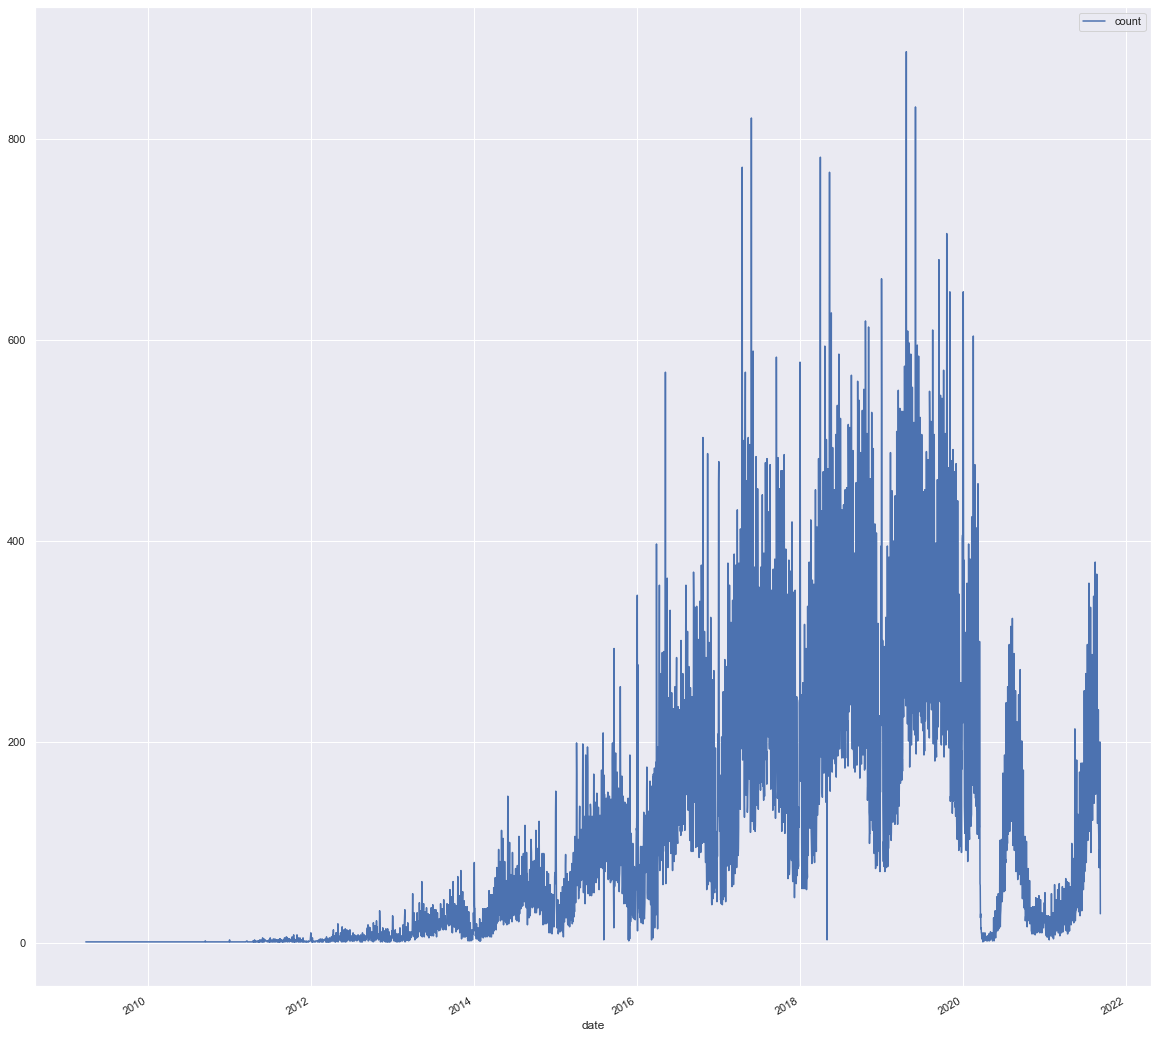

In [57]:
reviews.groupby("date").sum().plot(figsize=(20, 20));

>> 8. Dažniausi kambarių tipai, bei kokio tipo būstai nuomojami?

- Dažniausi kambarių tipai

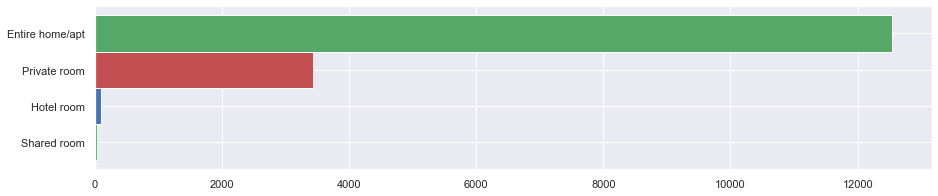

In [14]:
listings["room_type"].value_counts().sort_values(ascending=True).plot.barh(
    figsize=(15, 3), width=1, color=["g", "b", "r"]
);

- Būstų tipai

In [13]:
listings.property_type.unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Entire rental unit', 'Private room in houseboat',
       'Entire guest suite', 'Boat', 'Entire townhouse',
       'Private room in bed and breakfast', 'Private room in guest suite',
       'Houseboat', 'Private room in residential home',
       'Private room in loft', 'Room in bed and breakfast',
       'Entire guesthouse', 'Private room in boat',
       'Room in boutique hotel', 'Entire condominium (condo)',
       'Entire loft', 'Entire residential home',
       'Entire serviced apartment', 'Private room in farm stay',
       'Shared room in houseboat', 'Entire chalet',
       'Private room in guesthouse', 'Shared room in rental unit',
       'Entire bungalow', 'Private room in condominium (condo)',
       'Private room in island', 'Entire bed and breakfast',
       'Private room', 'Shared room in residential home', 'Entire villa',
       'Private room in tiny house', 'Shared room in bed and breakfast',
      

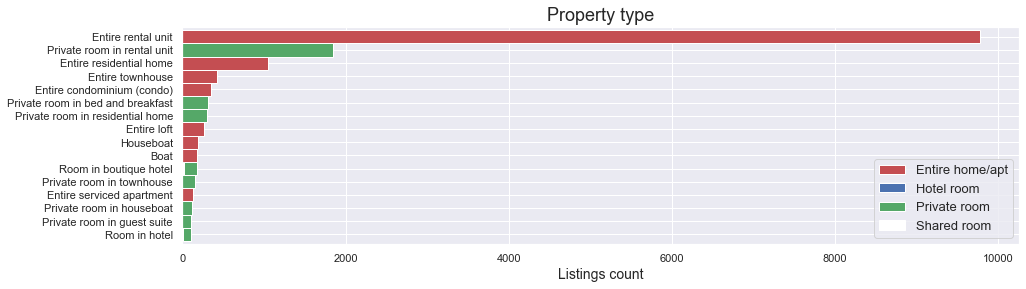

In [12]:
prop = listings.groupby(["property_type", "room_type"]).room_type.count()
prop = prop.unstack()
prop["total"] = prop.iloc[:, 0:3].sum(axis=1)
prop = prop.sort_values(by=["total"])
prop = prop[prop["total"] >= 100]
prop = prop.drop(columns=["total"])
prop.plot(
    kind="barh",
    stacked=True,
    color=["r", "b", "g", "w"],
    linewidth=1,
    grid=True,
    figsize=(15, 4),
    width=1,
)
plt.title("Property type", fontsize=18)
plt.xlabel("Listings count", fontsize=14)
plt.ylabel("")
plt.legend(loc=4, prop={"size": 13});

>> 9. Būstų žemėlapis

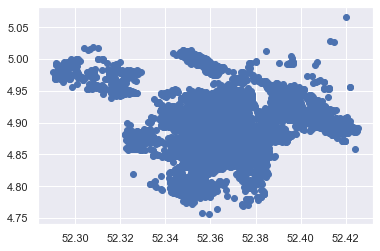

In [71]:
lats = listings["latitude"].tolist()
lons = listings["longitude"].tolist()
locations = list(zip(lats, lons))
plt.scatter(lats, lons);

In [72]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [73]:
import folium
from folium.plugins import FastMarkerCluster

In [81]:
map1 = folium.Map(location=[52.36, 4.92], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

>> 10. Kiek yra laisvų kambarių nuo 2021 rugsėjo 7d ir kokia jų vidutinė kaina?

In [82]:
calendar.head(2)

date available   price adjusted_price  minimum_nights  \
listing_id                                                               
489418     2021-09-07         f  $79.00         $79.00             2.0   
2818       2021-09-07         f  $59.00         $59.00             3.0   

            maximum_nights  
listing_id                  
489418                14.0  
2818                1125.0

In [83]:
calendar.price = calendar.price.str.replace(",", "")
calendar["price"] = pd.to_numeric(calendar["price"].str.strip("$"))
calendar = calendar[calendar.date < "2021-12-31"]
calendar.head(2)

date available  price adjusted_price  minimum_nights  \
listing_id                                                              
489418     2021-09-07         f   79.0         $79.00             2.0   
2818       2021-09-07         f   59.0         $59.00             3.0   

            maximum_nights  
listing_id                  
489418                14.0  
2818                1125.0

In [84]:
free_count = (
    calendar[calendar.available == "t"]
    .groupby(["date"])
    .size()
    .to_frame(name="available")
    .reset_index()
)
free_count.head()

date  available
0 2021-09-07        529
1 2021-09-08       1075
2 2021-09-09       1466
3 2021-09-10       1551
4 2021-09-11       1646

In [85]:
free_count["weekday"] = free_count["date"].dt.day_name()
free_count = free_count.set_index("date")
free_count

available    weekday
date                            
2021-09-07        529    Tuesday
2021-09-08       1075  Wednesday
2021-09-09       1466   Thursday
2021-09-10       1551     Friday
2021-09-11       1646   Saturday
2021-09-12       2028     Sunday
2021-09-13       2052     Monday
2021-09-14       2105    Tuesday
2021-09-15       2160  Wednesday
2021-09-16       2081   Thursday
2021-09-17       2000     Friday
2021-09-18       1986   Saturday
2021-09-19       2340     Sunday
2021-09-20       2305     Monday
2021-09-21       2314    Tuesday
2021-09-22       2315  Wednesday
2021-09-23       2242   Thursday
2021-09-24       2145     Friday
2021-09-25       2115   Saturday
2021-09-26       2453     Sunday
2021-09-27       2479     Monday
2021-09-28       2474    Tuesday
2021-09-29       2460  Wednesday
2021-09-30       2491   Thursday
2021-10-01       2393     Friday
2021-10-02       2364   Saturday
2021-10-03       2604     Sunday
2021-10-04       2586     Monday
2021-10-05       2565    Tuesday
2021-10-06       2568  Wednesday
2021-10-07       2515   Thursday
2021-10-08       2409     Friday
2021-10-09       2352   Saturday
2021-10-10       2537     Sunday
2021-10-11       2576     Monday
2021-10-12       2543    Tuesday
2021-10-13       2429  Wednesday
2021-10-14       2253   Thursday
2021-10-15       2013     Friday
2021-10-16       1998   Saturday
2021-10-17       2378     Sunday
2021-10-18       2680     Monday
2021-10-19       2748    Tuesday
2021-10-20       2782  Wednesday
2021-10-21       2757   Thursday
2021-10-22       2717     Friday
2021-10-23       2658   Saturday
2021-10-24       2753     Sunday
2021-10-25       2701     Monday
2021-10-26       2717    Tuesday
2021-10-27       2701  Wednesday
2021-10-28       2666   Thursday
2021-10-29       2585     Friday
2021-10-30       2526   Saturday
2021-10-31       2685     Sunday
2021-11-01       2804     Monday
2021-11-02       2817    Tuesday
2021-11-03       2834  Wednesday
2021-11-04       2837   Thursday
2021-11-05       2842     Friday
2021-11-06       2835   Saturday
2021-11-07       2915     Sunday
2021-11-08       2941     Monday
2021-11-09       2941    Tuesday
2021-11-10       2939  Wednesday
2021-11-11       2883   Thursday
2021-11-12       2858     Friday
2021-11-13       2861   Saturday
2021-11-14       2984     Sunday
2021-11-15       2951     Monday
2021-11-16       2950    Tuesday
2021-11-17       2960  Wednesday
2021-11-18       2964   Thursday
2021-11-19       2969     Friday
2021-11-20       2932   Saturday
2021-11-21       2996     Sunday
2021-11-22       3014     Monday
2021-11-23       3002    Tuesday
2021-11-24       3006  Wednesday
2021-11-25       2998   Thursday
2021-11-26       2980     Friday
2021-11-27       2982   Saturday
2021-11-28       3074     Sunday
2021-11-29       3101     Monday
2021-11-30       3093    Tuesday
2021-12-01       3044  Wednesday
2021-12-02       3009   Thursday
2021-12-03       2881     Friday
2021-12-04       2858   Saturday
2021-12-05       2933     Sunday
2021-12-06       2842     Monday
2021-12-07       2462    Tuesday
2021-12-08       2490  Wednesday
2021-12-09       2486   Thursday
2021-12-10       2488     Friday
2021-12-11       2486   Saturday
2021-12-12       2503     Sunday
2021-12-13       2506     Monday
2021-12-14       2517    Tuesday
2021-12-15       2512  Wednesday
2021-12-16       2483   Thursday
2021-12-17       2489     Friday
2021-12-18       2469   Saturday
2021-12-19       2484     Sunday
2021-12-20       2458     Monday
2021-12-21       2464    Tuesday
2021-12-22       2452  Wednesday
2021-12-23       2457   Thursday
2021-12-24       2470     Friday
2021-12-25       2472   Saturday
2021-12-26       2459     Sunday
2021-12-27       2421     Monday
2021-12-28       2391    Tuesday
2021-12-29       2346  Wednesday
2021-12-30       2223   Thursday

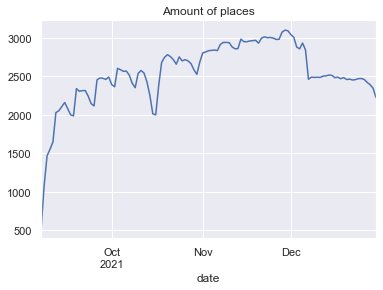

In [86]:
free_count.plot(y="available", title="Amount of places", legend="");

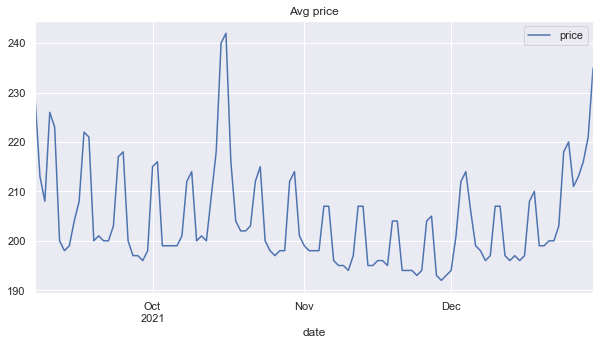

In [87]:
avg_price = (
    calendar[(calendar.available == "t")]
    .groupby(["date"])
    .mean()
    .astype(np.int64)
    .reset_index()
)
avg_price["weekday"] = avg_price["date"].dt.day_name()
avg_price = avg_price.set_index("date")
avg_price.plot(y="price", title="Avg price", figsize=(10, 5));